# L'algorithme des $k$ plus proches voisins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On commmence par importer des données simples. 50 exemples en 1 dimension (x) et avec une valeur cible réelle (y) Ã  prédire.

In [2]:
train = pd.read_csv("./thedata.csv")
train.head()

x          y
0  1.188915  -0.730554
1 -1.771694 -12.990353
2  2.199070  11.495108
3  4.570244  13.724001
4  0.688832   3.335676

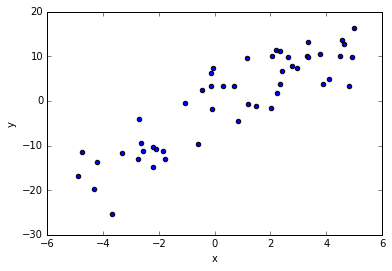

In [3]:
train.plot.scatter("x", "y")

Dans la librairie scikit-learn, on va chercher l'algorithme des k plus proches voisins (avec $k=2$) et on l'applique à  nos données

In [19]:
from sklearn import neighbors
# #############################################################################
# Fit regression knn model
k = 2
X = train.x.reshape(-1, 1)
y = train.y

neigh = neighbors.KNeighborsRegressor(n_neighbors=k).fit(X, y)
#print(train.x)

On veut être capable de prédire la valeur de y pour n'importe quelle valeur de x. Pour visualiser la fonction *f* de décision, on crée donc un DataFrame contenant 500 points espacés régulièrement dans l'intervalle des valeurs de x

In [20]:
xsupport = pd.DataFrame(np.linspace(min(train.x),max(train.x),500))


On prédit les valeurs que prendrait notre fonction de désision sur tout l'intervalle et on visualise

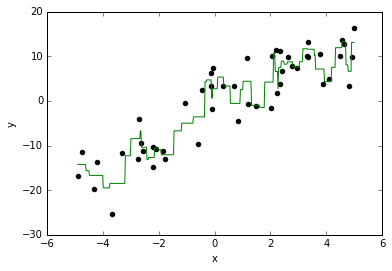

In [21]:
# dessiner la fonction de décision
y_knn = neigh.predict(xsupport)

#plt.plot(x, y)
train.plot.scatter("x", "y", color="black").plot(xsupport, y_knn, color="green")

Comparez cette fonction de décision avec celle apprise par la régression linéaire, également entraîné sur les 50 points initiaux.      

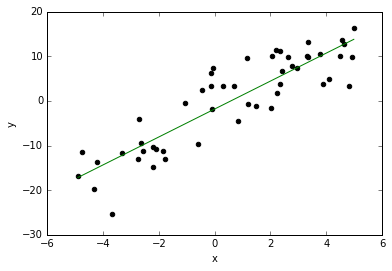

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
y_lr = lr.predict(xsupport)

train.plot.scatter("x", "y", color="black").plot(xsupport, y_lr, color="green")

> ## Questions
> 1. Caractériser ce qui distingue ces deux fonctions. 
> 2. Comparer leur erreur quadratique moyenne (EQM) sur le jeu d'apprentissage (cad leur **erreur empirique**). 

In [24]:
# Erreurs empiriques
# 
y_test_predict_knn = neigh.predict(X)
y_test_predict_lr  = lr.predict(X)

# Question 1
# KNN va plus respecter la position de chaque points : elle est quadratique
# La régression linéaire, elle, va faire la moyenne de tous les points par rapport à une droite : elle est linéaire

# Question 2
EQM_emp_knn = np.mean((y_test_predict_knn-y)**2) 
print("MSE KNN:", EQM_emp_knn)
print("MSE LR:", np.mean((y_test_predict_lr-y)**2) )

MSE KNN: 12.3660341246
MSE LR: 22.8486579272


> ## Questions
> 1. Essayez de faire varier la valeur de k. Que constatez vous?
> 2. Tracer les EQM obtenues en erreur empirique pour différentes valeurs de k.

__Question 1__ : Au plus la valeur de k , au plus l'EQM augmente. De plus, on a l'impression que la courbe se rapproche de la représentation d'une droite àgale à 0

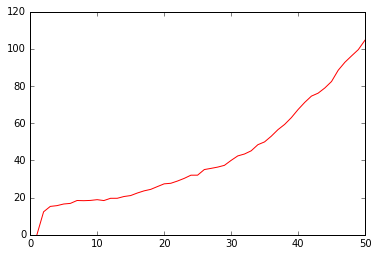

In [26]:
knn_predict_all_k = []

for kkk in range(1, 51):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=kkk).fit(X, y)
    knn_predict_all_k += [np.mean((neigh.predict(X)-y)**2)]


plt.plot(range(1, 51), knn_predict_all_k, color="red")

Calculons maintenant l'EQM sur un ensemble de test (non vu pendant l'apprentissage), cad l'**erreur en généralisation**. 

On charge tout d'abord ces données de test et on vérifie visuellement qu'elles semblent provenir de la même distribution que les données d'entraînement.

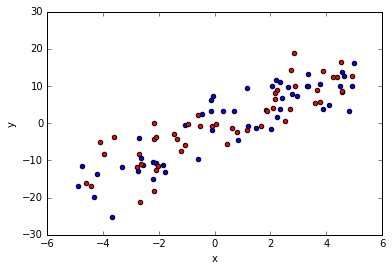

In [27]:
# Ensemble de test
test = pd.read_csv("./evaldata.csv")
ax=train.plot(kind="scatter", x="x", y="y")
test.plot(kind="scatter", x="x", y="y",ax=ax, color="red")


> ## Questions
> 1. Calculez la somme des carrés de résidus pour l'ensemble de test. (EQM)
> 2. Recommencez pour plusieurs valeurs de k. Tracez.
> 3. Comparez l'erreur en généralisation avec l'erreur empirique.
> 4. Quelle est la meilleure valeur pour k?

0.0
104.644842047


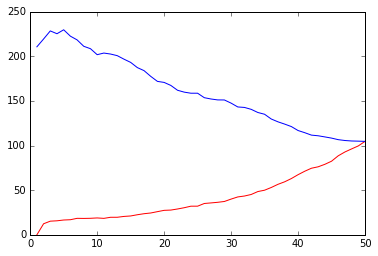

In [30]:
# Calcul des EQM pour plusieurs valeurs de k
X_test = test.x.reshape(-1, 1)
knn_test_predict_all_k = []

for kkk in range(1, len(X_test)+1):
    neigh = neighbors.KNeighborsRegressor(n_neighbors=kkk).fit(X, y)
    knn_test_predict_all_k += [np.mean((neigh.predict(X_test)-y)**2)]

# Comparatif entre l'erreur en généralisation avec l'erreur empirique
plt.plot(range(1, 51), knn_predict_all_k, color="red")
plt.plot(range(1, 51), knn_test_predict_all_k, color="blue")

# Meilleur EQM pour les valeurs en entrainement
print(min(knn_predict_all_k))

# Meilleur EQM pour les valeurs de test
print(min(knn_test_predict_all_k))

La meilleure valeur de k pour les valeurs d'entraînement est k = 1 (ou k = 2 si EQM =/= 0) <br/>
La meilleure valeur de k pour les valeurs d'entraînement est k = 50 